## Lesson 19:
### Exercise 1: Galaxy vs Quasars

In [54]:
import numpy as np
import matplotlib.pyplot as plt 
import pandas as pd
from sklearn.model_selection import train_test_split
from astroML.utils import split_samples
from astroML.utils import completeness_contamination
from sklearn.metrics import roc_curve
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import auc
from sklearn.metrics import accuracy_score
import seaborn as sns
%config InlineBackend.figure_format='retina'

c = sns.color_palette('Paired', 7)
plt.rcParams['figure.figsize'] = (8, 5)

#------------------- Function to read the data -------------------
def Dataframe(namefile):                                        #-
    df = pd.read_csv(namefile, sep=',', skipinitialspace=True)  #-
    return df                                                   #-
#-----------------------------------------------------------------

if "setup_text_plots" not in globals():
    from astroML.plotting import setup_text_plots
setup_text_plots(fontsize=10, usetex=False)


In [2]:
data = Dataframe("galaxyquasar.csv")
data = data.dropna()
num_rows = len(data.index)

In [20]:
u_g = np.array(data['u'] - data['g'])
g_r = np.array(data['g'] - data['r'])
r_i = np.array(data['r'] - data['i'])
i_z = np.array(data['i'] - data['z'])
classes = np.where(data['class']=='QSO', 1, 0) # 1 is QSO, 0 is GALAXY

# add those as dataframe columns
data['u-g'] = u_g
data['g-r'] = g_r
data['r-i'] = r_i
data['i-z'] = i_z
data['class_num'] = classes

display(data)

,u,g,r,i,z,class,z1,zerr,u-g,g-r,r-i,i-z,class_num
0,18.97213,18.53676,18.58280,18.34936,18.29215,QSO,0.522819,0.000155,0.43537,-0.04604,0.23344,0.05721,1
1,19.24592,17.47646,16.47817,16.04472,15.68851,GALAXY,0.122846,0.000028,1.76946,0.99829,0.43345,0.35621,0
2,19.43536,17.70268,16.91565,16.58327,16.39128,GALAXY,0.000000,0.000000,1.73268,0.78703,0.33238,0.19199,0
3,19.31626,18.18312,17.39591,16.94549,16.65395,GALAXY,0.147435,0.000009,1.13314,0.78721,0.45042,0.29154,0
4,19.28828,19.11188,18.88937,18.80013,18.49183,QSO,2.011455,0.000631,0.17640,0.22251,0.08924,0.30830,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,19.37295,18.12382,17.39886,16.98503,16.70585,GALAXY,0.113016,0.000011,1.24913,0.72496,0.41383,0.27918,0
49996,18.52021,16.88262,16.03280,15.56884,15.22454,GALAXY,0.085063,0.000014,1.63759,0.84982,0.46396,0.34430,0
49997,18.62718,17.30876,16.87371,16.62399,16.42296,GALAXY,0.054429,0.000008,1.31842,0.43505,0.24972,0.20103,0
49998,19.55140,18.27711,17.62101,17.21947,17.03347,GALAXY,0.112571,0.000009,1.27429,0.65610,0.40154,0.18600,0


### Train set / Test set split for validation
We can split the entire dataset into a **training set** and a **test set** using the Scikit Learn *train_test_split* function. The variable *ratio* defines the relative magnitude of the two.

In [21]:
ratio = 0.2 # 20% test set, 80% training set
train, test = train_test_split(data, test_size = ratio, random_state=42)
print('Test dataset: ')
display(test)
print('Training dataset: ')
display(train)

Test dataset: 


,u,g,r,i,z,class,z1,zerr,u-g,g-r,r-i,i-z,class_num
33553,19.57831,18.40447,17.63287,17.25110,16.95246,GALAXY,0.166232,0.000016,1.17384,0.77160,0.38177,0.29864,0
9427,19.06137,17.50107,16.83883,16.45573,16.16996,GALAXY,0.022549,0.000018,1.56030,0.66224,0.38310,0.28577,0
199,19.14627,18.85902,18.63394,18.45354,18.45074,QSO,1.959382,0.000621,0.28725,0.22508,0.18040,0.00280,1
12447,18.93706,17.70914,17.15452,16.82830,16.58504,GALAXY,0.039513,0.000009,1.22792,0.55462,0.32622,0.24326,0
39489,19.48735,17.97041,17.30248,16.96168,16.70040,GALAXY,0.027510,0.000026,1.51694,0.66793,0.34080,0.26128,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
28567,18.28208,16.20740,15.20348,14.74431,14.38276,GALAXY,0.081572,0.000019,2.07468,1.00392,0.45917,0.36155,0
25079,18.31848,16.33490,15.44536,15.00403,14.72712,GALAXY,0.044734,0.000013,1.98358,0.88954,0.44133,0.27691,0
18707,17.88730,16.93671,16.40274,16.19327,15.95487,GALAXY,0.021521,0.000006,0.95059,0.53397,0.20947,0.23840,0
15200,18.16156,17.27384,16.98327,16.79424,16.67116,GALAXY,0.038848,0.000003,0.88772,0.29057,0.18903,0.12308,0


Training dataset: 


,u,g,r,i,z,class,z1,zerr,u-g,g-r,r-i,i-z,class_num
39087,19.22438,19.17019,19.00367,19.03188,19.20255,QSO,1.197966,0.000517,0.05419,0.16652,-0.02821,-0.17067,1
30893,18.91440,17.78062,17.13216,16.70657,16.44945,GALAXY,0.120580,0.000009,1.13378,0.64846,0.42559,0.25712,0
45278,18.66879,18.61231,18.32929,18.29278,18.29923,QSO,1.273099,0.000217,0.05648,0.28302,0.03651,-0.00645,1
16398,19.22573,18.11540,17.75740,17.51038,17.37027,GALAXY,0.052860,0.000005,1.11033,0.35800,0.24702,0.14011,0
13653,19.59952,17.58880,16.52769,16.09341,15.69594,GALAXY,0.125066,0.000027,2.01072,1.06111,0.43428,0.39747,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
11284,18.83686,17.92360,17.58195,17.23962,17.16256,GALAXY,0.050244,0.000006,0.91326,0.34165,0.34233,0.07706,0
44732,18.33783,16.36797,15.52258,15.08636,14.73797,GALAXY,0.030502,0.000012,1.96986,0.84539,0.43622,0.34839,0
38158,18.35900,17.10936,16.64369,16.38526,16.19597,GALAXY,0.040411,0.000012,1.24964,0.46567,0.25843,0.18929,0
860,17.94330,16.51046,15.86447,15.57901,15.42299,GALAXY,0.000000,0.000000,1.43284,0.64599,0.28546,0.15602,0


In [22]:
feature_col = ['u-g', 'g-r', 'r-i', 'i-z']

data_c = data[feature_col]
lower_quantile = data_c.quantile(0.005)
upper_quantile = data_c.quantile(0.995)

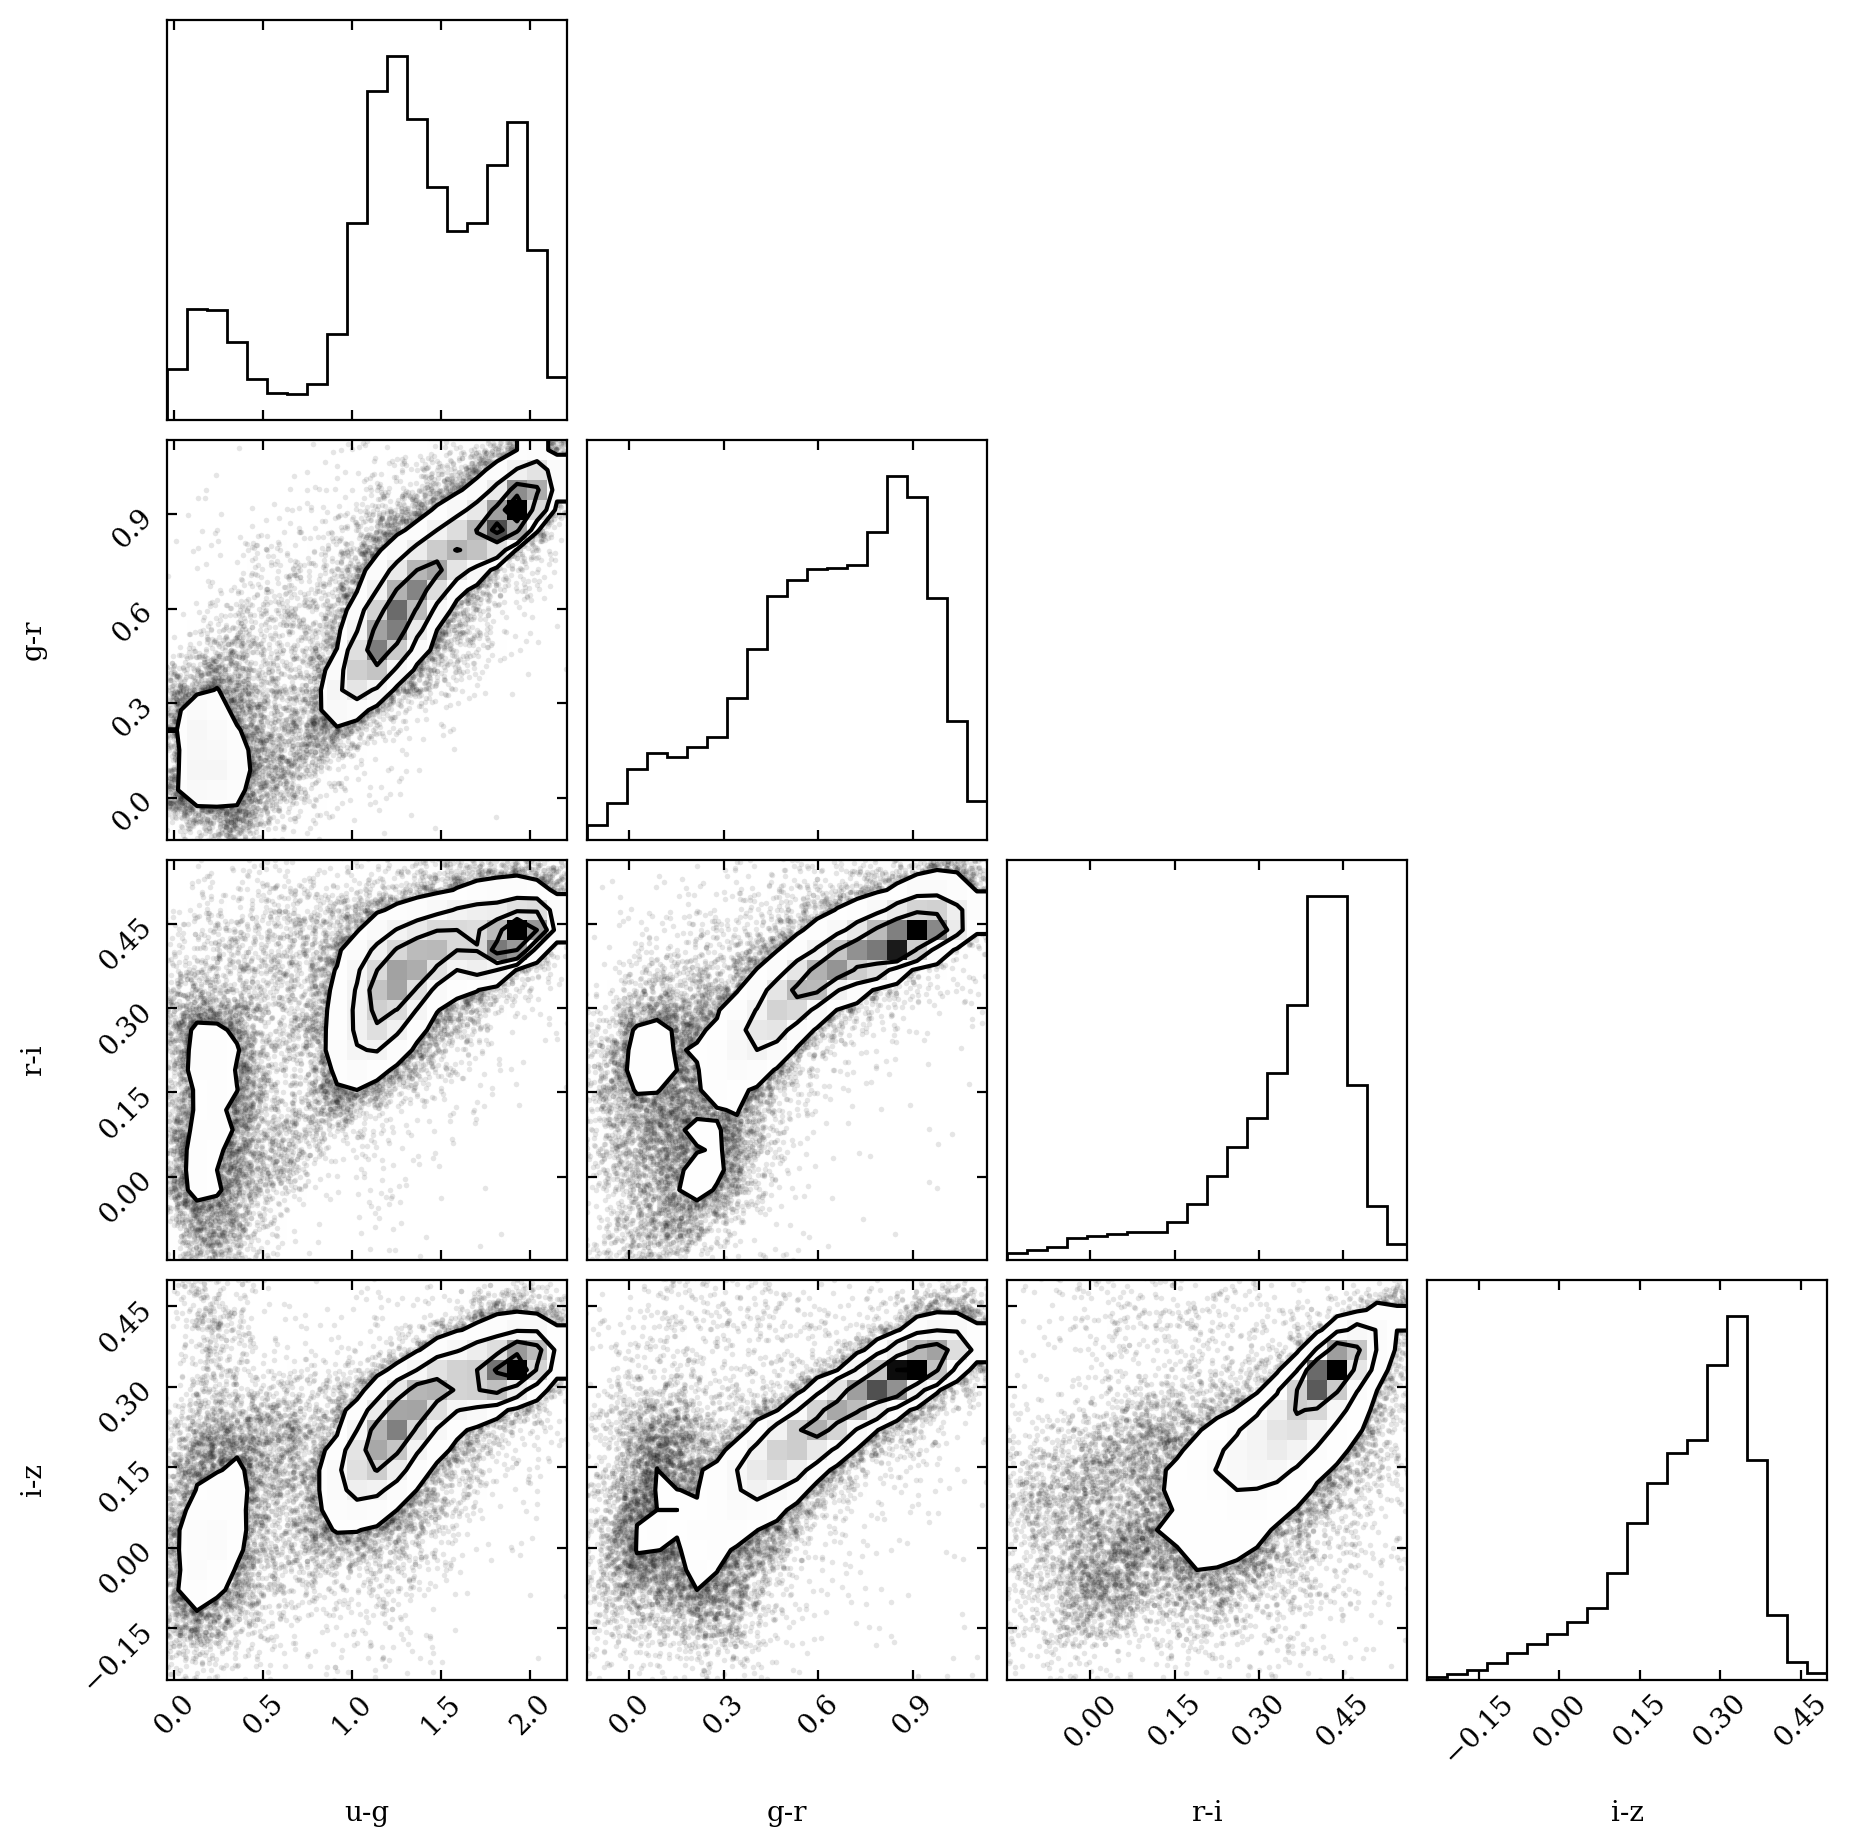

In [23]:
import corner
corner.corner(data_c, range=[(lower_quantile[col], upper_quantile[col]) for col in data_c.columns]);

- It looks like whenever `'u-g'` color is involved, the separation among the two targets is much more evident. Even `corner` alone is identifying different clusters in the data. 

Let's apply some classification algorithms

### Gaussian Naive Bayes (GNB)

Let's apply a **Gaussian Naive Bayes** classifier to the data considering all 4 colors. 

Then we visualize the result of the classification using the 'u-g' and 'g-r' features, for which the separation bewteen *galaxies* and *quasars* is the most evident, as seen in the previous image.

Number of colors: 4 
Accuracy: 97.4 %
Completeness: 92.4 %
Contamination: 10.4 %


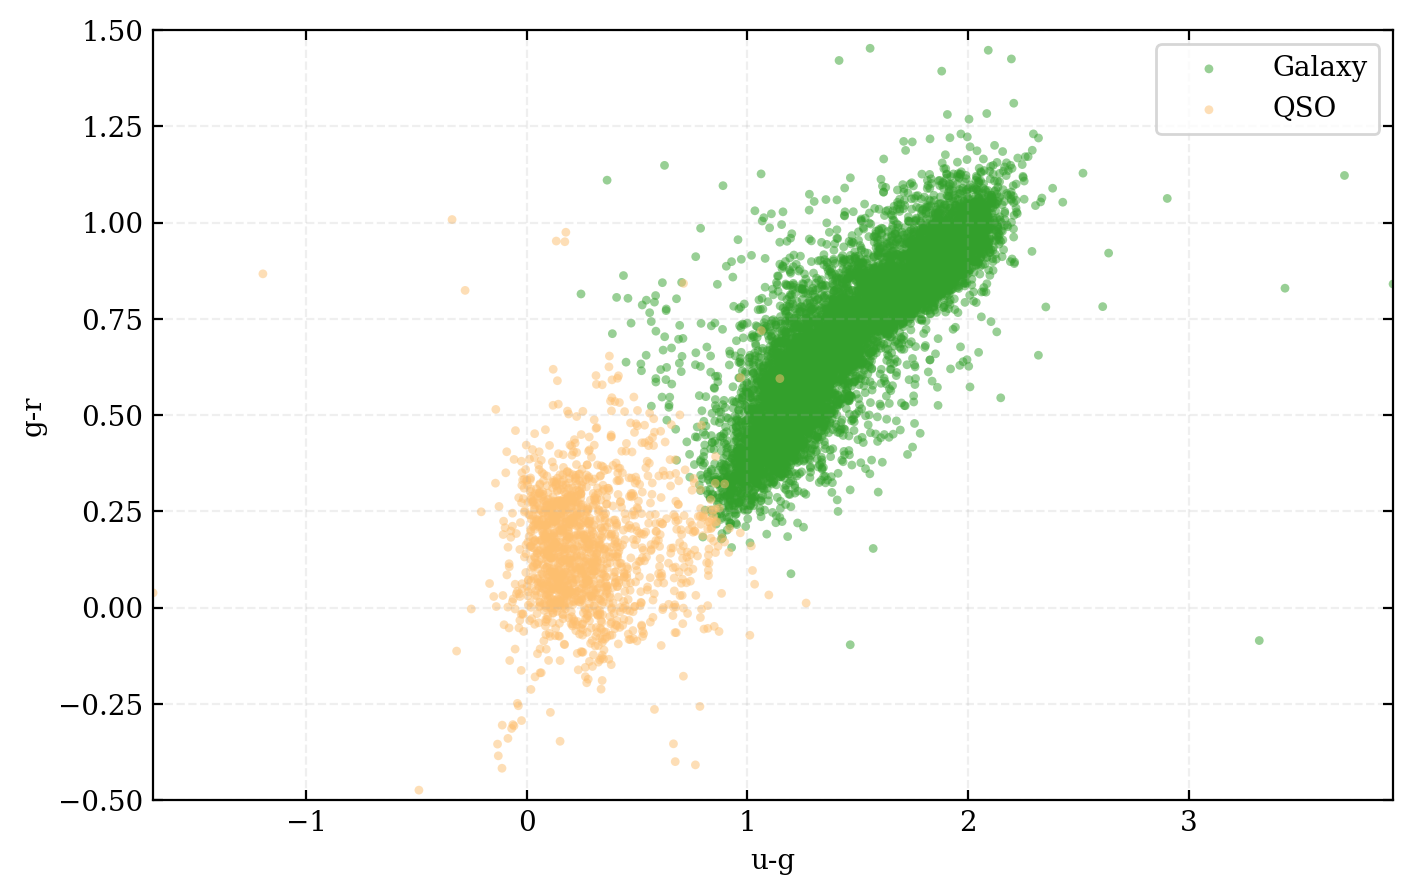

In [24]:
from sklearn.naive_bayes import GaussianNB

feature_col = np.array(['u-g', 'g-r', 'r-i', 'i-z'])

X_train = train[feature_col].values
y_train = train['class_num'].values

X_test = test[feature_col].values
y_test = test['class_num'].values

gnb = GaussianNB()
gnb.fit(X_train, y_train)

y_pred = gnb.predict(X_test)

galaxies = (y_pred == 0)

# Focus on 'u-g' and 'g-r' features, where the distinction between the two type of sources is more evident
plt.scatter(X_test[galaxies][:, 0], X_test[galaxies][:, 1], 
            s=10, edgecolors='none', alpha=0.5, 
            label='Galaxy', color=c[3])

plt.scatter(X_test[~galaxies][:, 0], X_test[~galaxies][:, 1], 
            s=10, edgecolors='none', alpha=0.5, 
            label='QSO', color=c[6])

plt.ylim(-0.5, 1.5)
plt.xlabel(feature_col[0])
plt.ylabel(feature_col[1])
plt.legend(loc='best', fontsize=10, frameon=True)
plt.grid(True, ls='--', alpha=0.2)
print('Number of colors:', len(feature_col), '\nAccuracy:', round(gnb.score(X_test, y_test)*100, 1), '%' )

# Computing completeness and contamination ---------------------------------
completeness, contamination = completeness_contamination(y_pred, y_test)
print('Completeness:', round(completeness*100, 1), '%')
print('Contamination:', round(contamination*100, 1), '%')


#### Let's repeat the same steps but with increasing number of features (colors) considered: **from 1 to 4**.

In [25]:
from astroML.utils import completeness_contamination

Ncolors = np.arange(1, feature_col.shape[0] + 1)

def compute_GNB(Ncolors):
    classifiers = []
    predictions = []
    probabilities = []
    accuracies = []
    for nc in Ncolors:
        gnb = GaussianNB()
        gnb.fit(X_train[:, :nc], y_train)
        y_pred = gnb.predict(X_test[:, :nc])
        y_probs = gnb.predict_proba(X_test[:, :nc])
        acc = gnb.score(X_test[:, :nc], y_test)

        classifiers.append(gnb)
        predictions.append(y_pred)
        probabilities.append(y_probs)
        accuracies.append(acc)
    
    return np.array(classifiers), np.array(predictions), np.array(probabilities), np.array(accuracies)

classifiers, predictions, probabilities, accuracies = compute_GNB(Ncolors)

completeness, contamination = completeness_contamination(predictions, y_test)

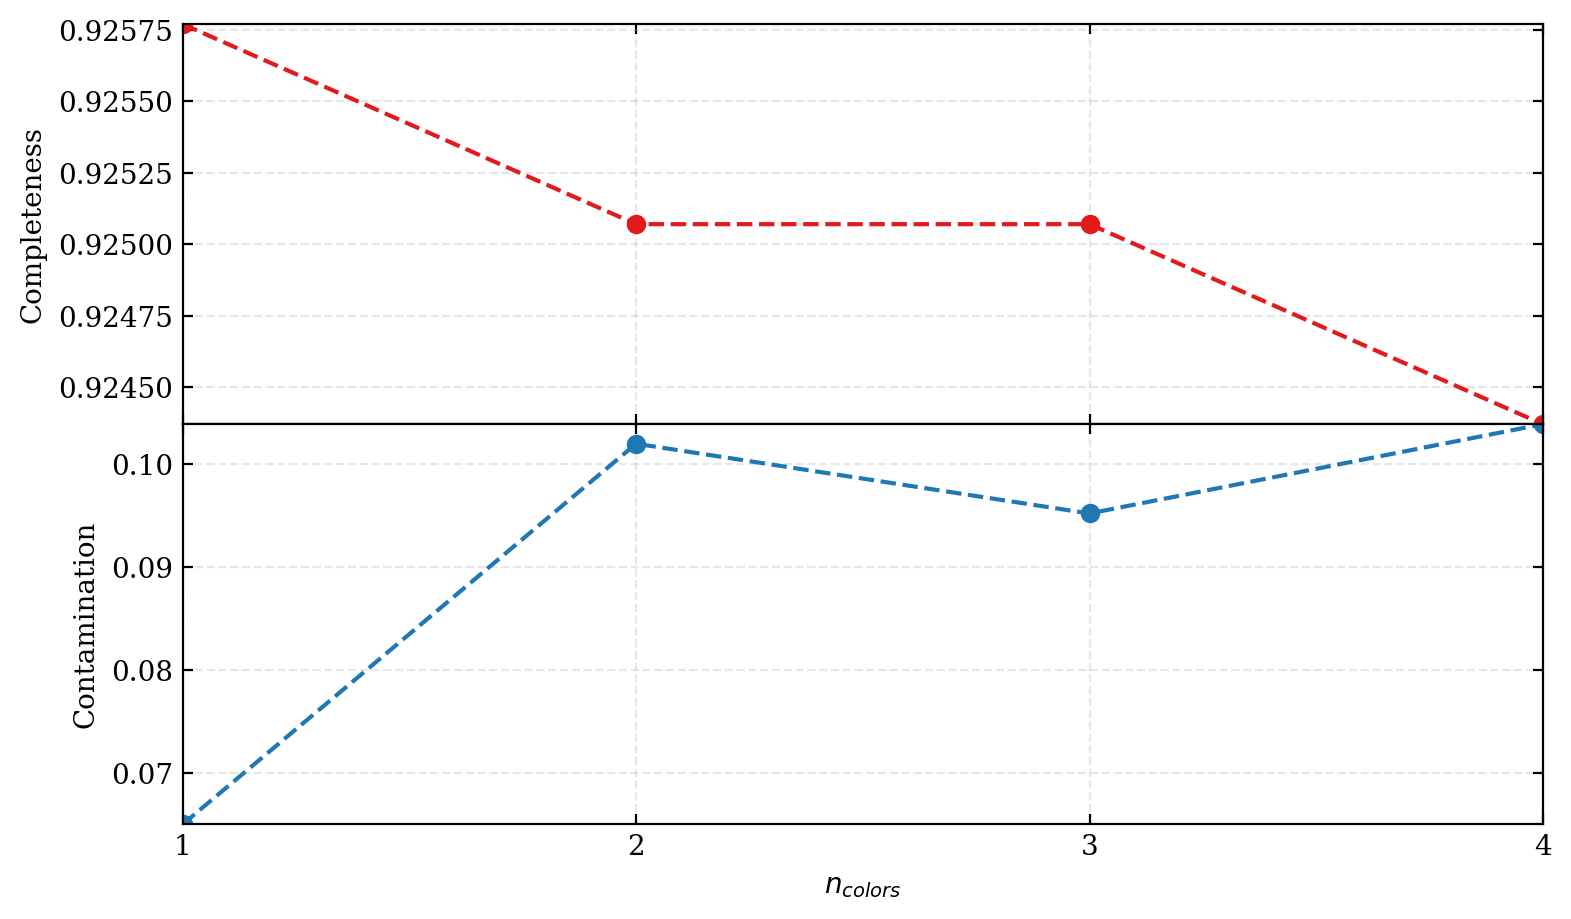

In [26]:
fig = plt.figure()
fig.subplots_adjust(bottom=0.15, top=0.95, hspace=0.0,
                    left=0.1, right=0.95, wspace=0.2)

ax = fig.add_subplot(211)
ax.plot(Ncolors, completeness, 'o--', ms=6, color=c[5])

ax.xaxis.set_major_locator(plt.MultipleLocator(1))
ax.xaxis.set_major_formatter(plt.NullFormatter())

ax.set_ylabel('Completeness')
ax.grid(True, ls='--', alpha=0.3)

ax = fig.add_subplot(212)

# plot completeness vs Ncolors
ax.plot(Ncolors, contamination, 'o--', ms=6, color=c[1])

ax.xaxis.set_major_locator(plt.MultipleLocator(1))

ax.set_ylabel('Contamination')
ax.grid(True, ls='--', alpha=0.3)

ax.set_xlabel(r'$n_{colors}$');

##### ROC curve (FPR vs TPR)

Now we want to plot the **ROC curve** which shows the relationship between the *true positive rate* and the *false positive rate*. The best classifier is the one which maximizes the area under the ROC curve (AUC score)

Let's decide here that the *target = 1* represents the "positive" case, hence the *quasars* (But it's completely arbitrary).

In [31]:
positive_probs = probabilities[:,:,1]

1 colors: Accuracy: 0.9802    Completeness: 0.9258    Contamination: 0.0651    AUC: 0.9802
2 colors: Accuracy: 0.9743    Completeness: 0.9251    Contamination: 0.1020    AUC: 0.9767
3 colors: Accuracy: 0.9754    Completeness: 0.9251    Contamination: 0.0952    AUC: 0.9757
4 colors: Accuracy: 0.9739    Completeness: 0.9244    Contamination: 0.1039    AUC: 0.9754


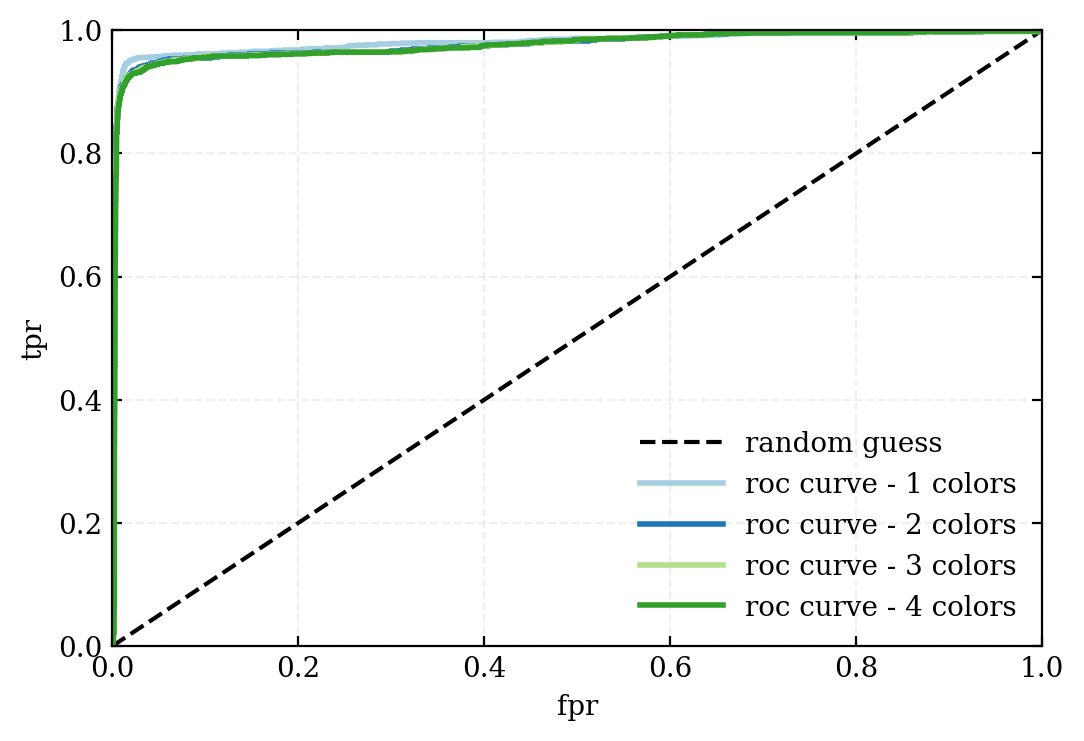

In [56]:
fig = plt.figure(figsize=(6,4))
ax = plt.subplot(111)
ax.plot([0,1], [0,1], '--k', label='random guess')

for n in range(4):
    fpr, tpr, thresholds = roc_curve(y_test, positive_probs[n,:])
    auc_score = auc(fpr, tpr)
    ax.plot(fpr, tpr, ls='-', lw=2., c=c[n], label=r'roc curve - %i colors'% (n+1))
    print(r"%i colors: Accuracy: %.4f    Completeness: %.4f    Contamination: %.4f    AUC: %.4f" \
          %((n+1), accuracies[n], completeness[n], contamination[n], auc_score))
    
ax.set_xlabel('fpr');
ax.set_ylabel('tpr');
ax.legend(loc='lower right', frameon=False);
plt.grid(True, ls='--', alpha=0.2)

In [33]:
for n in range(4):
    roc_auc = roc_auc_score(y_test, positive_probs[n,:])
    print(r'The AUC score of the classifier with %i colors is: %f'%(n+1, roc_auc))

The AUC score of the classifier with 1 colors is: 0.980196
The AUC score of the classifier with 2 colors is: 0.976731
The AUC score of the classifier with 3 colors is: 0.975745
The AUC score of the classifier with 4 colors is: 0.975418


Now it's quite clear that the first feature is the most important one, the GNB classifier trained only on the first feature gives the best accuracy and AUC score, as well as the highest completeness and lowest contamination. The problem can be boiled down to a 1D classification problem.

In [34]:
u_g_test = X_test[:, 0]

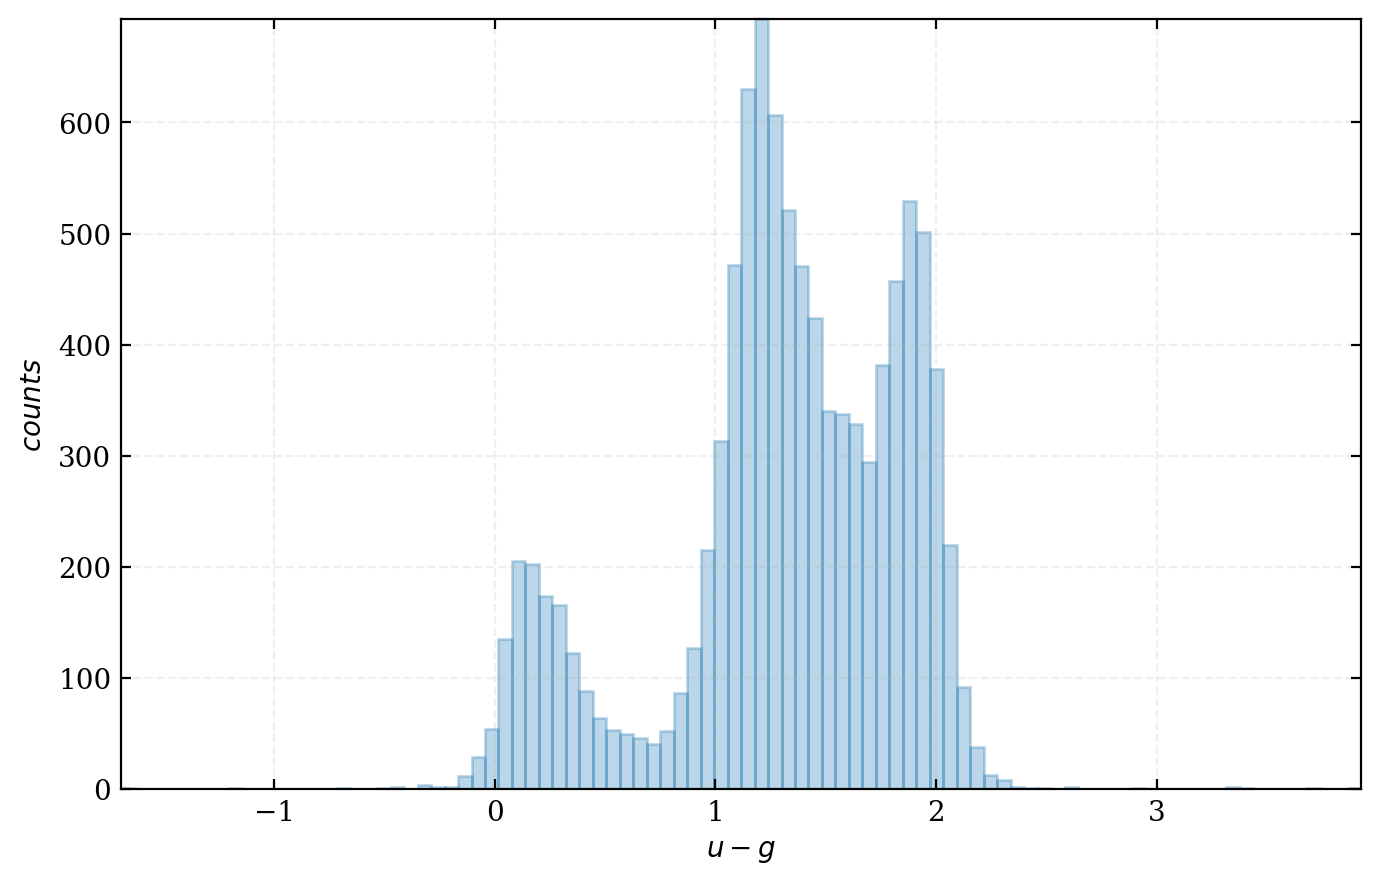

In [35]:
plt.hist(u_g_test, bins = 'auto', color=c[1], ec=c[1], alpha=0.3);
plt.grid(True, ls='--', alpha=0.2)
plt.xlabel(r"$u-g$")
plt.ylabel(r'$counts$');

In [36]:
single_color_pred = predictions[0] #Predictions of the 1-color GNB classifier

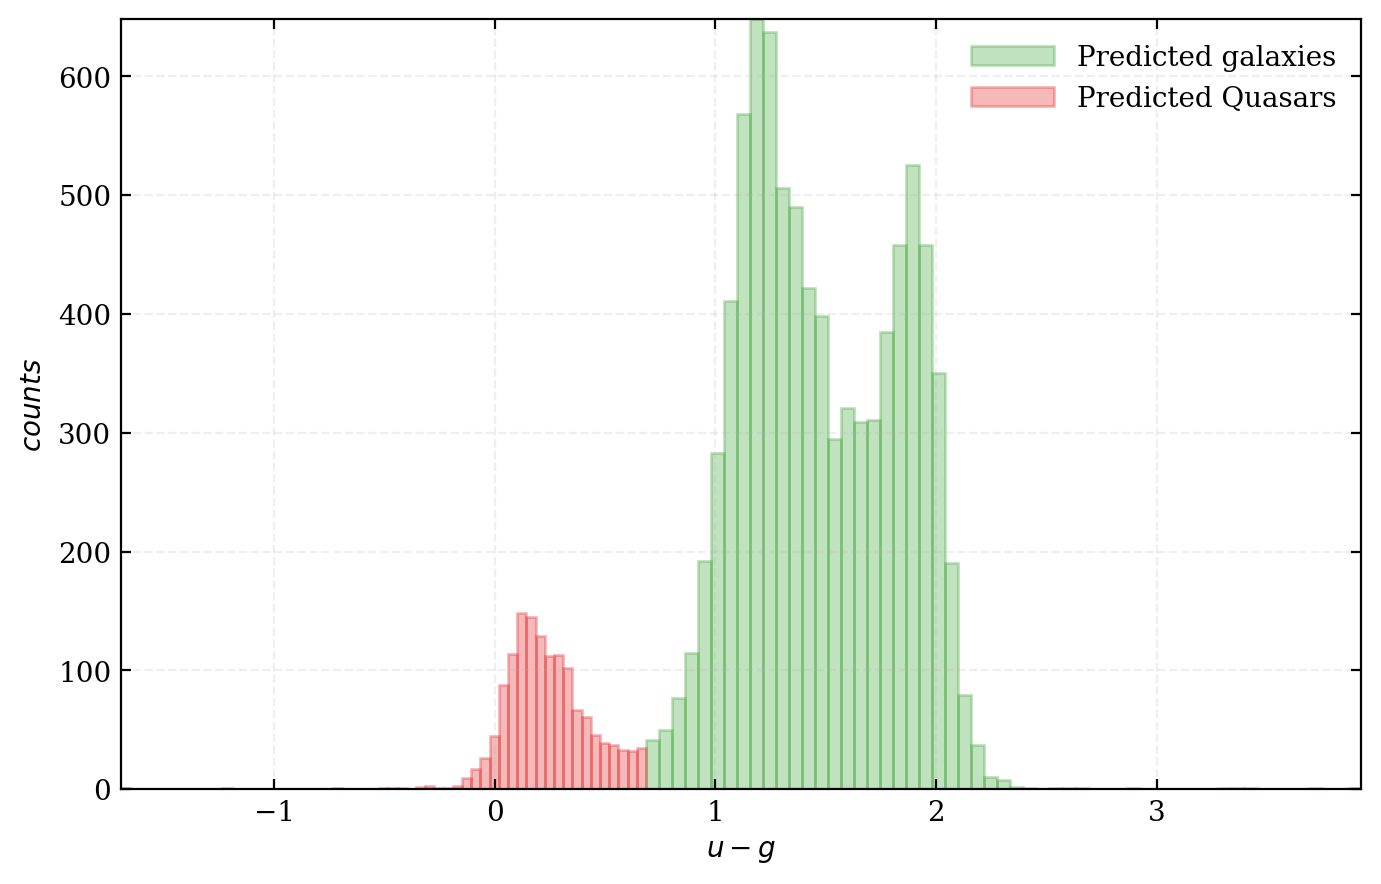

In [37]:
quasars_pred = u_g_test[single_color_pred == 1]
galaxies_pred = u_g_test[single_color_pred == 0]

plt.hist(galaxies_pred, bins = 'auto', color=c[3], ec=c[3], alpha=0.3, label='Predicted galaxies');
plt.hist(quasars_pred, bins = 'auto', color=c[5], ec=c[5], alpha=0.3, label='Predicted Quasars');
plt.grid(True, ls='--', alpha=0.2)
plt.xlabel(r"$u-g$")
plt.ylabel(r'$counts$')
plt.legend(loc='best', frameon=False)
plt.show()

### GMM Bayes Classifier (Gaussian Mixture Model Bayes Classifier)
Let's see if we can reach better accuracy with another classifier: **GMM Bayes classifier**

In [38]:
from astroML.classification import GMMBayes

In [39]:
gmmb = GMMBayes(3)
gmmb.fit(X_train[:, :1], y_train) #We fit the 'u-g' data only now.
GM_pred = gmmb.predict(X_test[:, :1])
GM_probs = gmmb.predict_proba(X_test[:, :1])
GM_acc = gmmb.score(X_test[:, :1], y_test)

In [40]:
quasars_pred_GM = u_g_test[GM_pred == 1]
galaxies_pred_GM = u_g_test[GM_pred == 0]

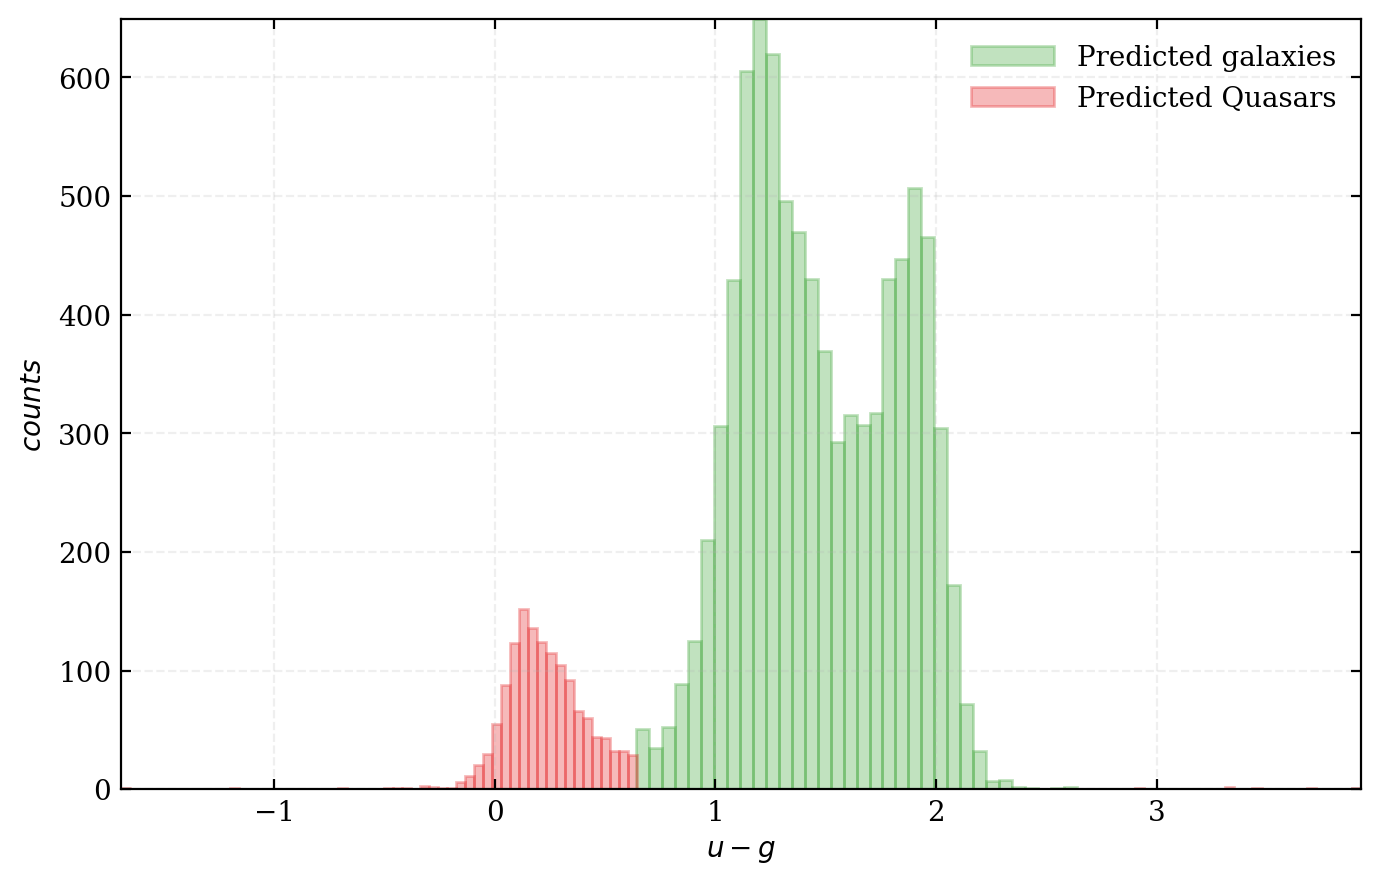

In [41]:
plt.hist(galaxies_pred_GM, bins = 'auto', color=c[3], ec=c[3], alpha=0.3, label='Predicted galaxies');
plt.hist(quasars_pred_GM, bins = 'auto', color=c[5], ec=c[5], alpha=0.3, label='Predicted Quasars');
plt.grid(True, ls='--', alpha=0.2)
plt.xlabel(r"$u-g$")
plt.ylabel(r'$counts$')
plt.legend(loc='best', frameon=False)
plt.show()

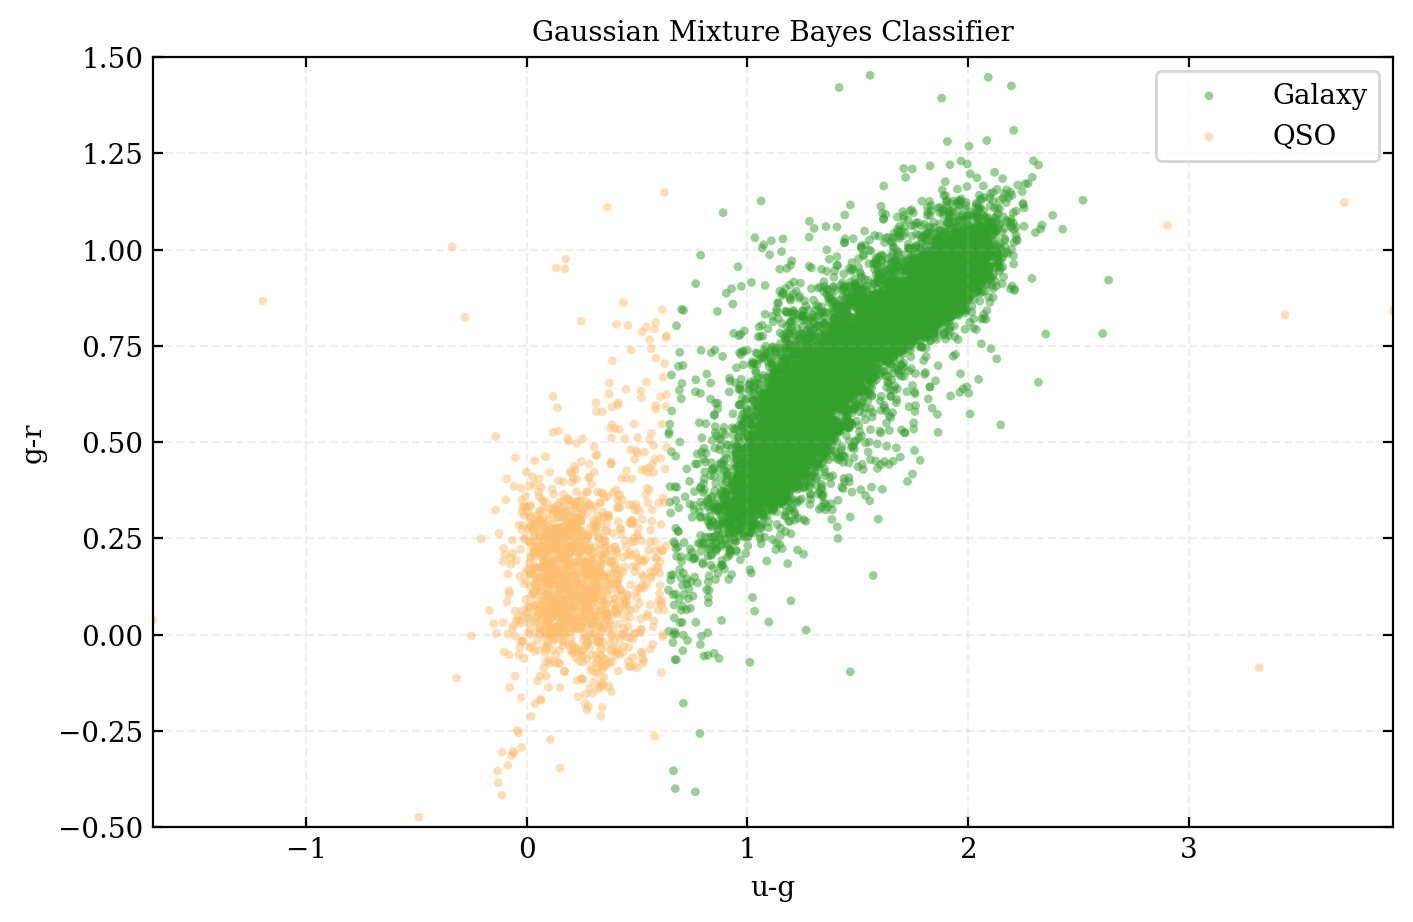

In [42]:
galaxies_GM = (GM_pred == 0)

# Focus on 'u-g' and 'g-r' features, where the distinction between the two type of sources is more evident
plt.scatter(X_test[galaxies_GM][:, 0], X_test[galaxies_GM][:, 1], 
            s=10, edgecolors='none', alpha=0.5, 
            label='Galaxy', color=c[3])

plt.scatter(X_test[~galaxies_GM][:, 0], X_test[~galaxies_GM][:, 1], 
            s=10, edgecolors='none', alpha=0.5, 
            label='QSO', color=c[6])

plt.ylim(-0.5, 1.5)
plt.legend(loc='best', fontsize=10, frameon=True)
plt.grid(True, ls='--', alpha=0.2)
plt.xlabel(feature_col[0])
plt.ylabel(feature_col[1])
plt.title(r'Gaussian Mixture Bayes Classifier')
plt.show()

In [43]:
completeness_GM, contamination_GM = completeness_contamination(GM_pred, y_test)

GMM perfomance: 
	Accuracy: 0.9800    Completeness: 0.9139    Contamination: 0.0557


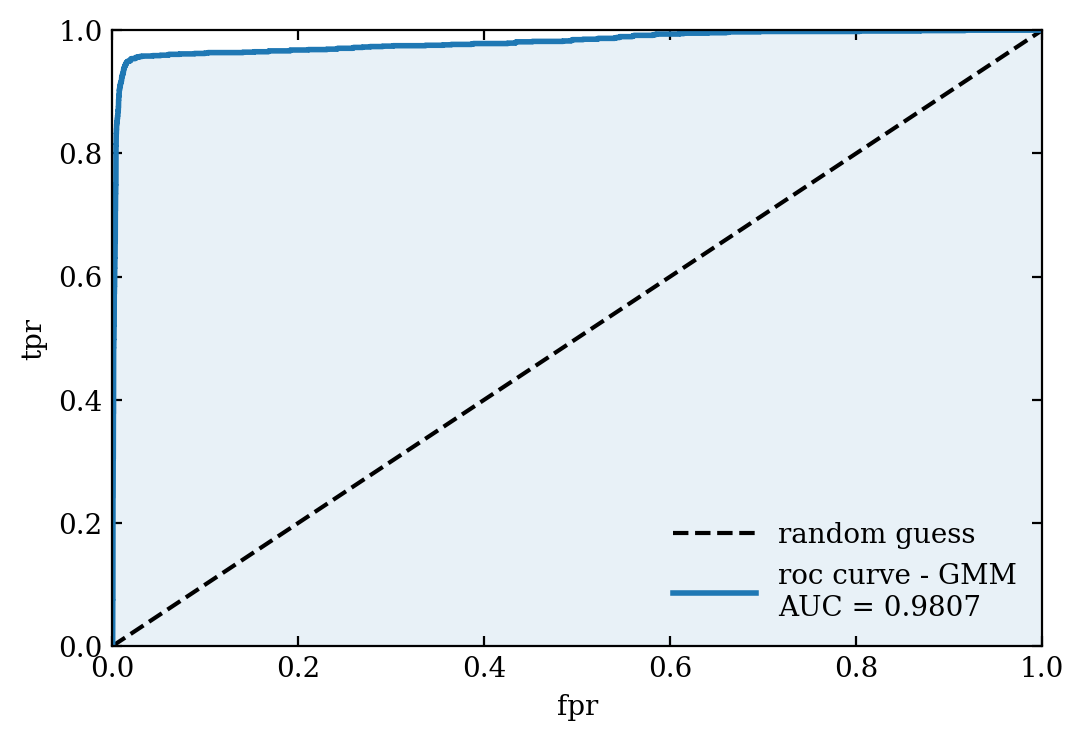

In [53]:
positive_probs_GM = GM_probs[:,1]
fpr_GM, tpr_GM, thresholds_GM = roc_curve(y_test, positive_probs_GM)

auc_GM = auc(fpr_GM, tpr_GM)

fig = plt.figure(figsize=(6,4))
ax = plt.subplot(111)
ax.plot([0,1], [0,1], '--k', label='random guess')

ax.plot(fpr_GM, tpr_GM, ls='-', lw=2., c=c[1], label=f'roc curve - GMM\nAUC = %.4f'%auc_GM)
ax.fill_between(fpr_GM, tpr_GM, color=c[1], alpha=0.1)
print(f"GMM perfomance: \n\tAccuracy: %.4f    Completeness: %.4f    Contamination: %.4f" 
          %(GM_acc, completeness_GM, contamination_GM))
    
ax.set_xlabel('fpr');
ax.set_ylabel('tpr');
ax.legend(loc='lower right', frameon=False);

Let's try one last algorithm, **K-Nearest Neighbor classifier**

### K-Nearest Neighbor Classifier

In [65]:
from sklearn.neighbors import KNeighborsClassifier

k_neighbors = 10

knc = KNeighborsClassifier(k_neighbors) #5 nearest neighbors
knc.fit(X_train[:, :1], y_train)
knc_pred = knc.predict(X_test[:, :1])
knc_probs = knc.predict_proba(X_test[:, :1])
knc_acc = knc.score(X_test[:, :1], y_test)

In [66]:
quasars_pred_knc = u_g_test[knc_pred == 1]
galaxies_pred_knc = u_g_test[knc_pred == 0]

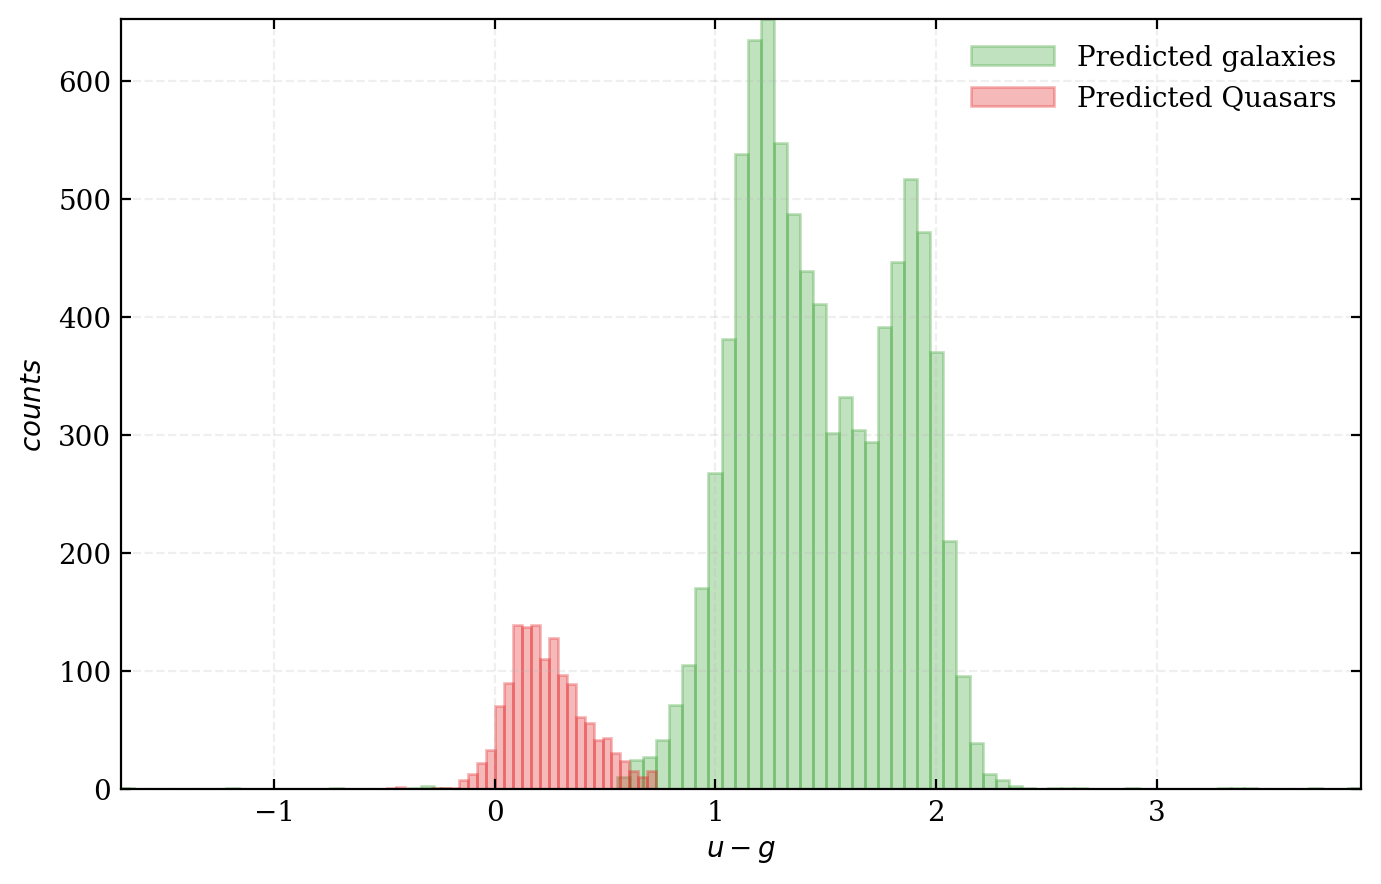

In [67]:
plt.hist(galaxies_pred_knc, bins = 'auto', color=c[3], ec=c[3], alpha=0.3, label='Predicted galaxies');
plt.hist(quasars_pred_knc, bins = 'auto', color=c[5], ec=c[5], alpha=0.3, label='Predicted Quasars');
plt.grid(True, ls='--', alpha=0.2)
plt.xlabel(r"$u-g$")
plt.ylabel(r'$counts$')
plt.legend(loc='best', frameon=False)
plt.show()

In [68]:
completeness_knc, contamination_knc = completeness_contamination(knc_pred, y_test)
print(f"KNC perfomance: \n\tAccuracy: %.4f    Completeness: %.4f    Contamination: %.4f" 
          %(knc_acc, completeness_knc, contamination_knc))

KNC perfomance: 
	Accuracy: 0.9802    Completeness: 0.9132    Contamination: 0.0537


Let's visualize the classification in a 2D plot, `u-g` vs `g-r`.

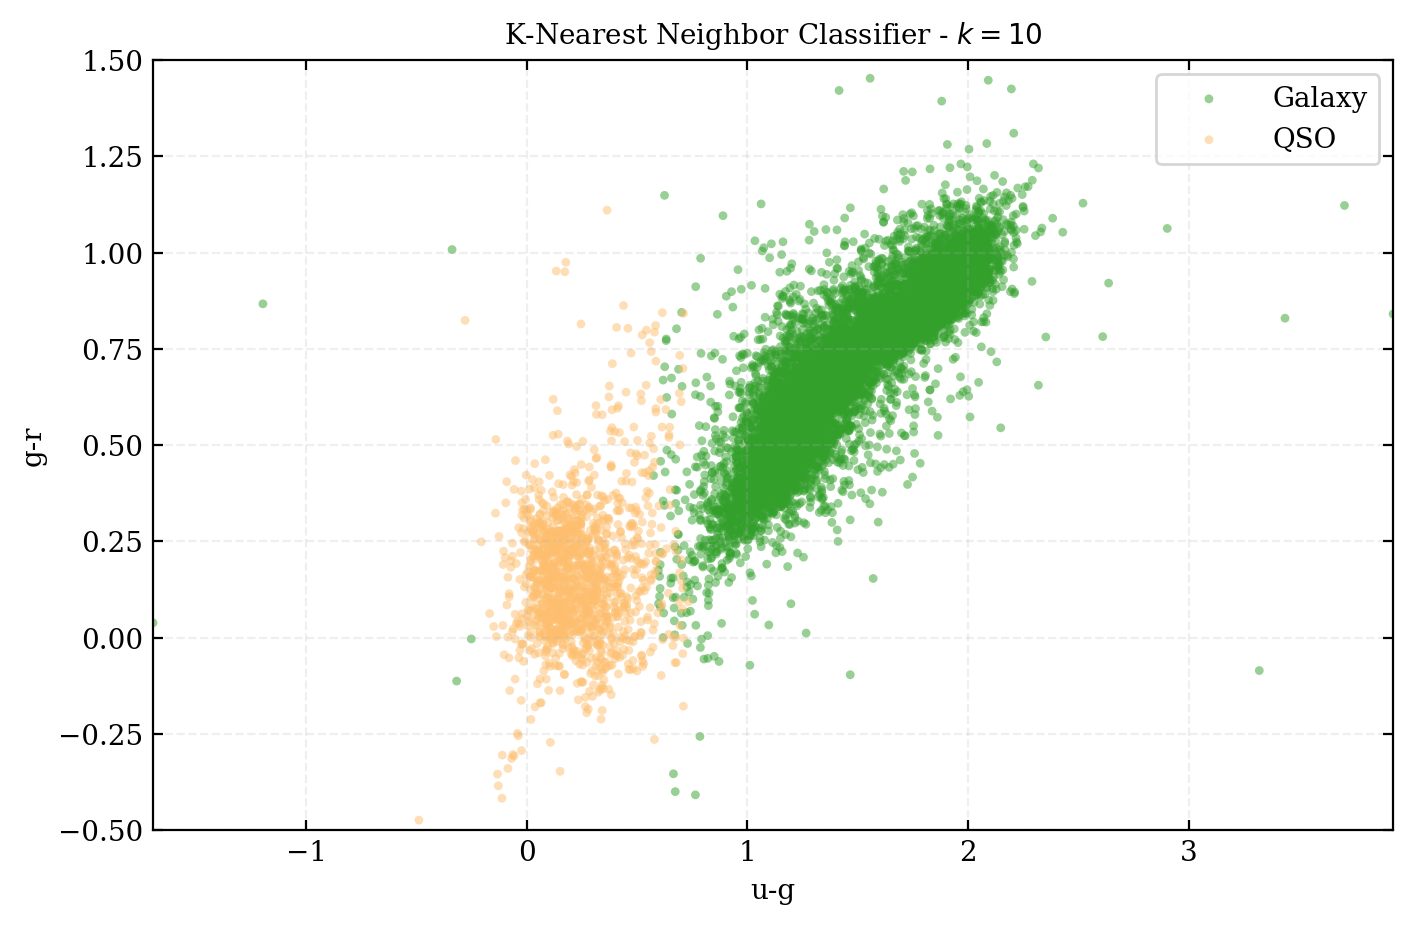

In [69]:
galaxies_knc = (knc_pred == 0)

# Focus on 'u-g' and 'g-r' features, where the distinction between the two type of sources is more evident
plt.scatter(X_test[galaxies_knc][:, 0], X_test[galaxies_knc][:, 1], 
            s=10, edgecolors='none', alpha=0.5, 
            label='Galaxy', color=c[3])

plt.scatter(X_test[~galaxies_knc][:, 0], X_test[~galaxies_knc][:, 1], 
            s=10, edgecolors='none', alpha=0.5, 
            label='QSO', color=c[6])

plt.ylim(-0.5, 1.5)
plt.legend(loc='best', fontsize=10, frameon=True)
plt.grid(True, ls='--', alpha=0.2)
plt.xlabel(feature_col[0])
plt.ylabel(feature_col[1])
plt.title(r'K-Nearest Neighbor Classifier - $k = %i$'%k_neighbors)
plt.show()

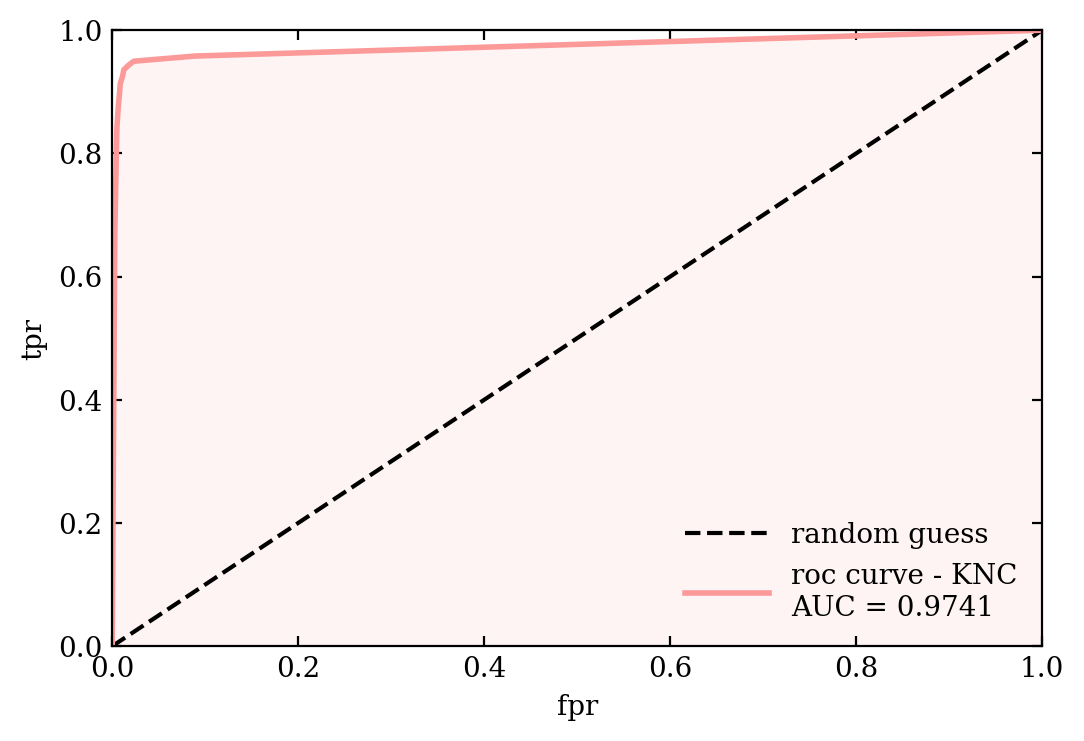

In [72]:
positive_probs_knc = knc_probs[:,1]
fpr_knc, tpr_knc, thresholds_knc = roc_curve(y_test, positive_probs_knc)
auc_knc = auc(fpr_knc, tpr_knc)

fig = plt.figure(figsize=(6,4))
ax = plt.subplot(111)
ax.plot([0,1], [0,1], '--k', label='random guess')

ax.plot(fpr_knc, tpr_knc, ls='-', lw=2., c=c[4], label=f'roc curve - KNC\nAUC = %.4f'%auc_knc)
ax.fill_between(fpr_knc, tpr_knc, color=c[4], alpha=0.1)

ax.set_xlabel('fpr');
ax.set_ylabel('tpr');
ax.legend(loc='lower right', frameon=False);

Even though **K-Nearest Neighbor Classifier** produces an accuracy extremely close to those obtained with the other algorithms, it seems that this last classifier is better at discriminating between sources at the boundary. 